In [1]:
from bs4 import BeautifulSoup
import requests

def getText(brandId):
    headers = {'User-Agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
              }
    response = requests.get('https://www.whiskyadvocate.com/ratings-reviews/?search=&submit=+&brand_id={}&rating=0&price=0&category=0&styles_id=0&issue_id=0'.format(brandId),headers = headers)
    text = BeautifulSoup(response.text, 'html.parser')
    return text

In [4]:
import re 

whiskey_titles = []
whiskey_prices = []
whiskey_percent = []
whiskey_review = []
whiskey_category = []
whiskey_brand = []
whiskey_reviewer = []
brands_id_f = []
brand_name_f = []

#Read all brand ids and names to query the whiskey advocate website
with open("whiskey_brands.csv", "r", newline=None) as fd:
    for line in fd:
        line = line.replace("\n", "")
        split_names = line.split(',')
        brands_id_f.append(split_names[0])
        brand_name_f.append(split_names[1])

counter = 0

#For each brand, extract all product details - Note the pull takes < 5 mins
while (counter < len(brands_id_f)):
    progress = counter/len(brands_id_f) * 100
    print('Load Completion: ',progress,'%')
    text = getText(brands_id_f[counter])
    whiskies = text.find_all(attrs = {'class': 'm-all t-1of3 d-1of3 col cf align-items-stretch showmore'})

    # For each product, add to the dictionaries
    for tag in whiskies:
        title = tag.find('h1',attrs={'itemprop':'name'}).text
        price = tag.find('span',attrs={'itemprop':'price'}).text
        review = tag.find('span',attrs={'itemprop':'ratingValue'}).text
       
        # A subset of products do not contain a reviewer - set an empty string
        if ((tag.find('span',attrs={'itemprop':'author'}) != None)):
            reviewer = tag.find('span',attrs={'itemprop':'author'}).text
        else:
            reviewer =""
        category = tag.find('span',attrs={'itemprop':'category'}).text  

        # Clean up price - Price pulled backed contains different formats
        price = price.replace('or','/')
        split_string = price.split("/", 1)
        price = split_string[0]
        price = price.replace('$','')
      
        # Add items to the dictionaries
        whiskey_brand.append(brand_name_f[counter])
        whiskey_titles.append(title)
        whiskey_percent.append((title.split()[-1]))
        whiskey_prices.append(float(price.replace(',','')))
        whiskey_review.append(int(review))
        whiskey_reviewer.append(reviewer)
        whiskey_category.append(category)
    counter += 1

Load Completion:  0.0 %
Load Completion:  0.08833922261484099 %
Load Completion:  0.17667844522968199 %
Load Completion:  0.26501766784452296 %
Load Completion:  0.35335689045936397 %
Load Completion:  0.441696113074205 %
Load Completion:  0.5300353356890459 %
Load Completion:  0.6183745583038869 %
Load Completion:  0.7067137809187279 %
Load Completion:  0.7950530035335688 %
Load Completion:  0.88339222614841 %
Load Completion:  0.9717314487632509 %
Load Completion:  1.0600706713780919 %
Load Completion:  1.1484098939929328 %
Load Completion:  1.2367491166077738 %
Load Completion:  1.325088339222615 %
Load Completion:  1.4134275618374559 %
Load Completion:  1.5017667844522968 %
Load Completion:  1.5901060070671376 %
Load Completion:  1.678445229681979 %
Load Completion:  1.76678445229682 %
Load Completion:  1.8551236749116609 %
Load Completion:  1.9434628975265018 %
Load Completion:  2.0318021201413425 %
Load Completion:  2.1201413427561837 %
Load Completion:  2.208480565371025 %
Load 

Load Completion:  18.90459363957597 %
Load Completion:  18.992932862190813 %
Load Completion:  19.081272084805654 %
Load Completion:  19.169611307420496 %
Load Completion:  19.257950530035338 %
Load Completion:  19.346289752650176 %
Load Completion:  19.434628975265017 %
Load Completion:  19.52296819787986 %
Load Completion:  19.6113074204947 %
Load Completion:  19.699646643109542 %
Load Completion:  19.78798586572438 %
Load Completion:  19.87632508833922 %
Load Completion:  19.964664310954063 %
Load Completion:  20.053003533568905 %
Load Completion:  20.141342756183743 %
Load Completion:  20.229681978798585 %
Load Completion:  20.318021201413426 %
Load Completion:  20.406360424028268 %
Load Completion:  20.49469964664311 %
Load Completion:  20.58303886925795 %
Load Completion:  20.671378091872793 %
Load Completion:  20.759717314487634 %
Load Completion:  20.848056537102476 %
Load Completion:  20.936395759717314 %
Load Completion:  21.024734982332156 %
Load Completion:  21.113074204946

Load Completion:  37.80918727915194 %
Load Completion:  37.897526501766784 %
Load Completion:  37.985865724381625 %
Load Completion:  38.07420494699647 %
Load Completion:  38.16254416961131 %
Load Completion:  38.25088339222615 %
Load Completion:  38.33922261484099 %
Load Completion:  38.42756183745583 %
Load Completion:  38.515901060070675 %
Load Completion:  38.60424028268552 %
Load Completion:  38.69257950530035 %
Load Completion:  38.78091872791519 %
Load Completion:  38.869257950530034 %
Load Completion:  38.957597173144876 %
Load Completion:  39.04593639575972 %
Load Completion:  39.13427561837456 %
Load Completion:  39.2226148409894 %
Load Completion:  39.31095406360424 %
Load Completion:  39.399293286219084 %
Load Completion:  39.48763250883392 %
Load Completion:  39.57597173144876 %
Load Completion:  39.6643109540636 %
Load Completion:  39.75265017667844 %
Load Completion:  39.840989399293285 %
Load Completion:  39.92932862190813 %
Load Completion:  40.01766784452297 %
Load Co

Load Completion:  56.80212014134276 %
Load Completion:  56.8904593639576 %
Load Completion:  56.978798586572445 %
Load Completion:  57.06713780918727 %
Load Completion:  57.155477031802114 %
Load Completion:  57.243816254416956 %
Load Completion:  57.3321554770318 %
Load Completion:  57.42049469964664 %
Load Completion:  57.50883392226148 %
Load Completion:  57.59717314487632 %
Load Completion:  57.685512367491164 %
Load Completion:  57.773851590106005 %
Load Completion:  57.86219081272085 %
Load Completion:  57.95053003533569 %
Load Completion:  58.03886925795053 %
Load Completion:  58.12720848056537 %
Load Completion:  58.21554770318021 %
Load Completion:  58.303886925795055 %
Load Completion:  58.3922261484099 %
Load Completion:  58.48056537102474 %
Load Completion:  58.56890459363958 %
Load Completion:  58.657243816254415 %
Load Completion:  58.745583038869256 %
Load Completion:  58.8339222614841 %
Load Completion:  58.92226148409894 %
Load Completion:  59.01060070671378 %
Load Com

Load Completion:  75.8833922261484 %
Load Completion:  75.97173144876325 %
Load Completion:  76.06007067137809 %
Load Completion:  76.14840989399293 %
Load Completion:  76.23674911660777 %
Load Completion:  76.32508833922262 %
Load Completion:  76.41342756183745 %
Load Completion:  76.5017667844523 %
Load Completion:  76.59010600706713 %
Load Completion:  76.67844522968198 %
Load Completion:  76.76678445229682 %
Load Completion:  76.85512367491167 %
Load Completion:  76.9434628975265 %
Load Completion:  77.03180212014135 %
Load Completion:  77.12014134275618 %
Load Completion:  77.20848056537103 %
Load Completion:  77.29681978798587 %
Load Completion:  77.3851590106007 %
Load Completion:  77.47349823321554 %
Load Completion:  77.56183745583039 %
Load Completion:  77.65017667844522 %
Load Completion:  77.73851590106007 %
Load Completion:  77.8268551236749 %
Load Completion:  77.91519434628975 %
Load Completion:  78.00353356890459 %
Load Completion:  78.09187279151944 %
Load Completion: 

Load Completion:  95.0530035335689 %
Load Completion:  95.14134275618375 %
Load Completion:  95.22968197879858 %
Load Completion:  95.31802120141343 %
Load Completion:  95.40636042402826 %
Load Completion:  95.49469964664311 %
Load Completion:  95.58303886925795 %
Load Completion:  95.6713780918728 %
Load Completion:  95.75971731448763 %
Load Completion:  95.84805653710248 %
Load Completion:  95.93639575971731 %
Load Completion:  96.02473498233216 %
Load Completion:  96.113074204947 %
Load Completion:  96.20141342756183 %
Load Completion:  96.28975265017668 %
Load Completion:  96.37809187279152 %
Load Completion:  96.46643109540636 %
Load Completion:  96.5547703180212 %
Load Completion:  96.64310954063605 %
Load Completion:  96.73144876325088 %
Load Completion:  96.81978798586573 %
Load Completion:  96.90812720848056 %
Load Completion:  96.99646643109541 %
Load Completion:  97.08480565371025 %
Load Completion:  97.1731448763251 %
Load Completion:  97.26148409893993 %
Load Completion:  

In [7]:
import pandas as pd
  
# Create dictionary
details = {
    'Brand' : whiskey_brand,
    'Title' : whiskey_titles,
    'Price' : whiskey_prices,
    'Alcohol_percentage' : whiskey_percent,
    'Review' : whiskey_review,
    'Category' : whiskey_category,
    'Reviewer' : whiskey_reviewer
}
  
# create a dataframe object 
df = pd.DataFrame(details)
df

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
0,10th Street,"10th Street American Single Malt, 46%",65.0,46%,89,Single Malt American Whiskey,Susannah Skiver Barton
1,10th Street,"10th Street Distiller’s Cut Peated, 44%",65.0,44%,87,Single Malt American Whiskey,Susannah Skiver Barton
2,10th Street,"10th Street California Coast Blended, 42%",40.0,42%,87,American Whiskey,Ted Simmons
3,10th Street,"10th Street STR Cask American Single Malt, 46%",65.0,46%,86,Single Malt American Whiskey,Susannah Skiver Barton
4,1792,"1792 Full Proof, 62.5%",45.0,62.5%,92,Bourbon/Tennessee,John Hansell
5,1792,"1792 Bottled in Bond, 50%",36.0,50%,92,Bourbon/Tennessee,Jeffery Lindenmuth
6,1792,"1792 Small Batch, 46.85%",30.0,46.85%,90,Bourbon/Tennessee,Fred Minnick
7,1792,"1792 Bottled in Bond, 50%",36.0,50%,90,Bourbon/Tennessee,Fred Minnick
8,1792,1792 12 year old Small Batch Kentucky Straight...,50.0,48.3%,90,Bourbon/Tennessee,David Fleming
9,1792,"1792 225th Anniversary, 46.075%",36.0,46.075%,89,Bourbon/Tennessee,Fred Minnick


Is there a trend between price and review?

In [34]:
# Before we explore the data, lets begin by removing extreme price values
import pandas as pd
import numpy as np
df = df[np.abs(df.Price-df.Price.mean()) <= (3*df.Price.std())]

Text(0, 0.5, 'Rating (out of 100)')

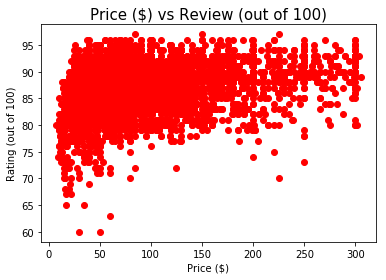

In [35]:
# FIGURE 1 - PRICE vs REVIEW
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(df['Price'],df['Review'], color = 'red')
plt.title('Price ($) vs Review (out of 100)', fontsize = 15)
plt.xlabel('Price ($)')
plt.ylabel('Rating (out of 100)')

From the above chart, we can clearly see there's a positive trend between Price and Review. Lets dig deeper and determine how the overall reviews are distributed.

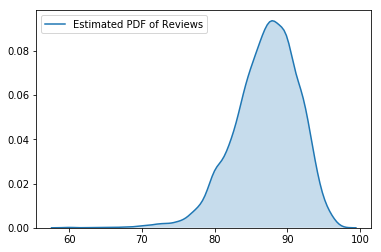

In [36]:
#FIGURE 2 - Review distribution
sns.kdeplot(df['Review'], shade = True, label = 'Estimated PDF of Reviews')

From FIGURE 2 we can see the the reviews are distributed around 85-95 out of 100. In general, if you were to pick a whiskey bottle randomly you would most likely pick a bottle that reviewed well. Lets dig deeper and determine the number of whiskey bottles by category

Text(0, 0.5, 'Number of Wines')

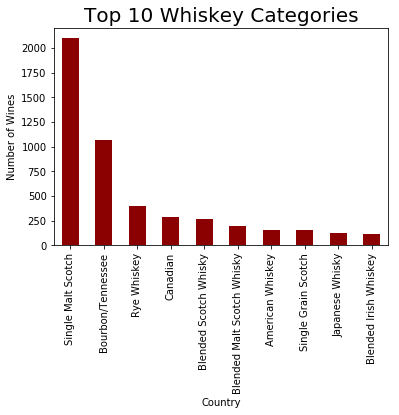

In [37]:
#FIGURE 3 - Category count - # of bottles
df.groupby('Category')['Price'].count().sort_values(ascending = False).nlargest(10).plot.bar(color = 'darkred')
plt.title('Top 10 Whiskey Categories', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Number of Wines')

As expected there's a large number of single malts (Scotch) in excess of 2,000 bottles, followed by bourbon. Before we take a closer look at each category lets determine the average review/price by category.

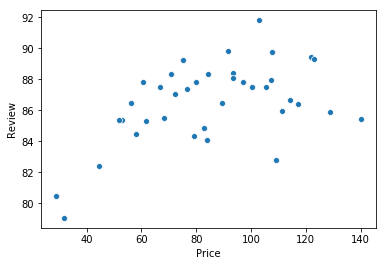

In [73]:
df_category = df.groupby('Category').agg({'Review':'mean','Price':'mean'}).sort_values(by ='Review',  ascending=False)
df_category.assign(Category=df_category.index.get_level_values('Category'))
# df_category['aCategory'] = df_category['Category']
#df_category.reset_index(level=df_category['Category'])
# df_category[['Category']]
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(df_category['Price'],df_category['Review'])
#FIGURE 4

From Figure 4, we can see .......

Now lets work on identifying a whiskey bottles with a high review that costs less $150

In [80]:
# Amend the dataframe to filter out whiskies great than $150 + a review > 90
df_150 = df[(df['Review'] > 90) & (df['Price'] <= 150)]

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
4,1792,"1792 Full Proof, 62.5%",45.0,62.5%,92,Bourbon/Tennessee,John Hansell
5,1792,"1792 Bottled in Bond, 50%",36.0,50%,92,Bourbon/Tennessee,Jeffery Lindenmuth
33,Aberfeldy,Aberfeldy 18 year old French Red Wine Cask-Fin...,120.0,43%,93,Single Malt Scotch,Gavin Smith
34,Aberfeldy,Aberfeldy 18 year old French Red Wine Cask-Fin...,120.0,43%,93,Single Malt Scotch,Jeffery Lindenmuth
47,Aberlour,Aberlour A’bunadh Alba Cask Strength (Batch #0...,90.0,57.1%,93,Single Malt Scotch,Susannah Skiver Barton
48,Aberlour,Aberlour A’bunadh Alba Cask Strength (Batch #0...,90.0,57.1%,93,Single Malt Scotch,Susannah Skiver Barton
49,Aberlour,Duncan Taylor 16 year old “NC2” (distilled at ...,80.0,46%,92,Single Malt Scotch,John Hansell
50,Aberlour,"Aberlour 18 year old, 43%",125.0,43%,92,Single Malt Scotch,Gavin Smith
79,Adnams,"Adnams Single Malt, 40%",70.0,40%,91,Single Malt English Whisky,Jonny McCormick
85,Ailsa Bay,"Ailsa Bay, 48.9%",79.0,48.9%,91,Single Malt Scotch,Gavin Smith


Before we determine a pick of high review whiskies, lets look at the distribution for the cateogies that ....

From df_150, we could now determine the top whiskey bottle of choice by picking the top 5 whiskies from this list by review

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

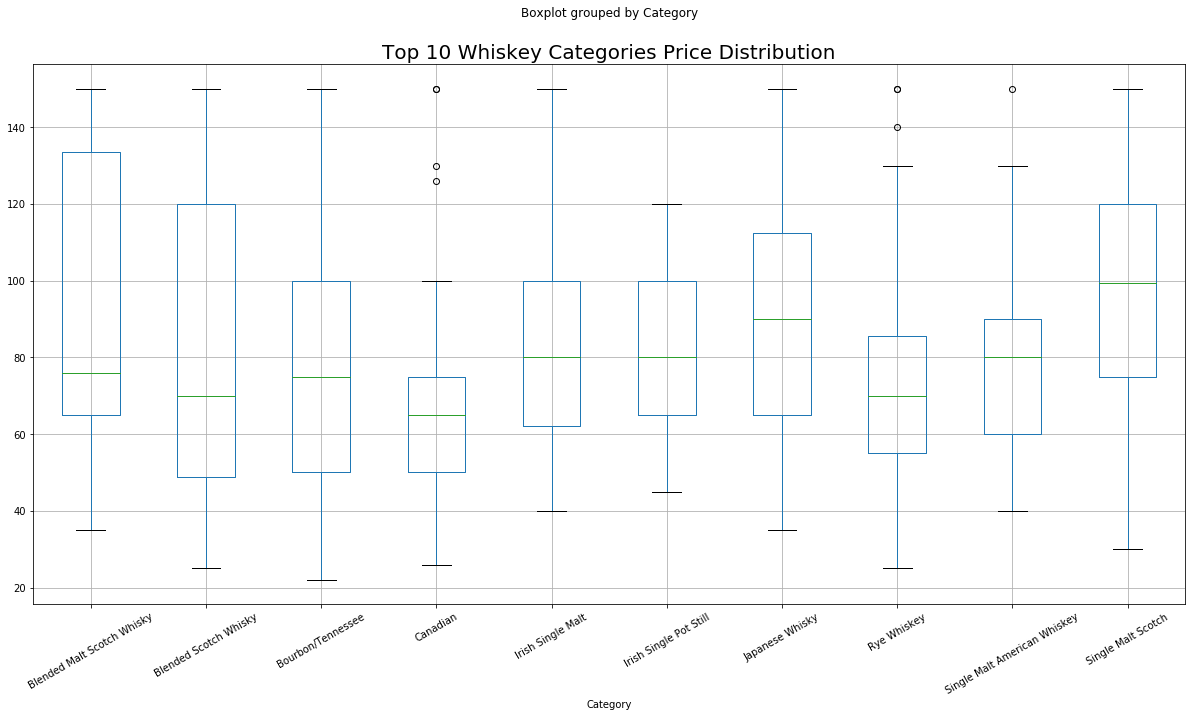

In [113]:
df_150_price = df_150[df_150['Category'].isin(df_150['Category'].value_counts().nlargest(10).index.tolist())]
df_150_price = df_150_price[['Category', 'Price']]
df_150_price.boxplot(by = 'Category', column = 'Price', figsize=(20,10))
plt.title('Top 10 Whiskey Categories Price Distribution', fontsize = 20)
plt.xticks(rotation = 30)

Based on the price distribution, Single Malt Scoth cost more on average with Candian costing less. It's also worth noting the Blended Malt Scoth Whiskey had a greater dispersion.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

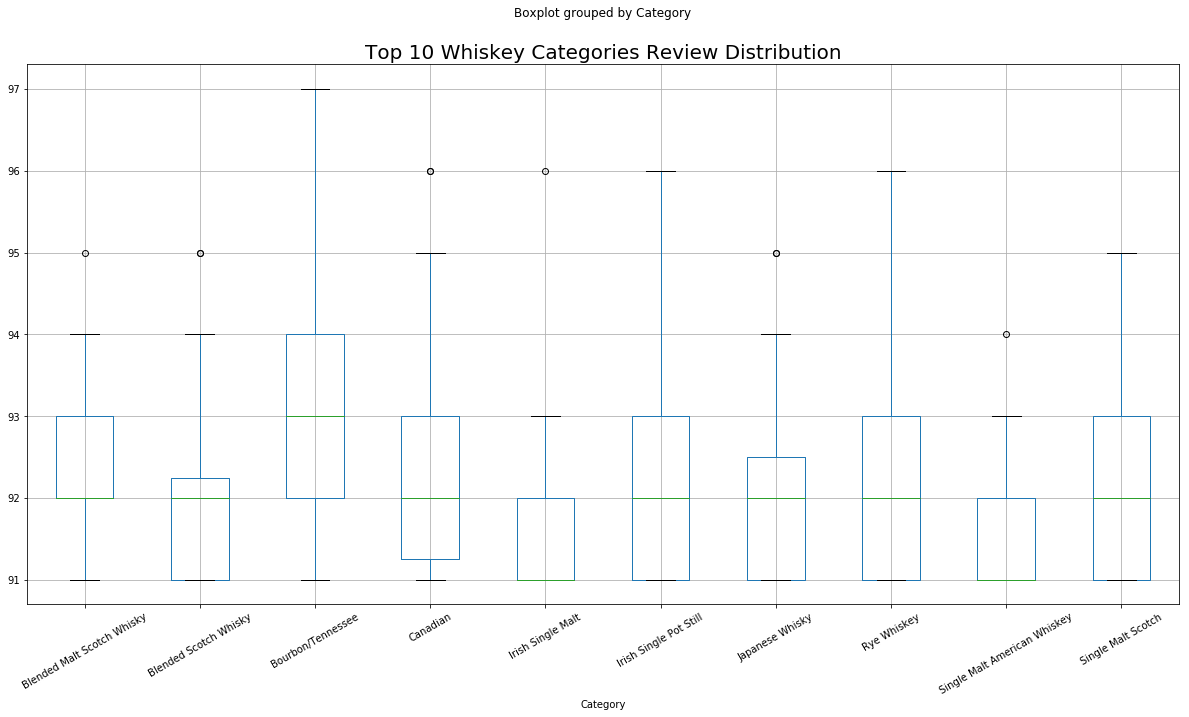

In [114]:
df_150_review = df_150[df_150['Category'].isin(df_150['Category'].value_counts().nlargest(10).index.tolist())]
df_150_review = df_150_review[['Category', 'Review']]
df_150_review.boxplot(by = 'Category', column = 'Review', figsize=(20,10))
plt.title('Top 10 Whiskey Categories Review Distribution', fontsize = 20)
plt.xticks(rotation = 30)

Based on the box plot, Bourbon/Tennessee on average yielded a greater review with Irish and American Single Malts not reviewed favorably.

The top wwiskey of choice purely based on Price was two Bourbon whiskies called Parker's Heritage Collection, 'Golden Anniversary and our Roses Limited Edition Small Batch (2013 R..

In [127]:
pd.set_option('display.width', 1000)
df_150.sort_values(by=['Review'], ascending=False).nlargest(5,'Review')

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
4823,Parker's Heritage Collection,"Parker's Heritage Collection, 'Golden Annivers...",150.0,50%,97,Bourbon/Tennessee,John Hansell
2376,Four Roses,Four Roses Limited Edition Small Batch (2013 R...,85.0,51.5%,97,Bourbon/Tennessee,John Hansell
3556,Jefferson's,"Jefferson’s Presidential Select, 18 year old, 47%",110.0,47%,96,Bourbon/Tennessee,John Hansell
1098,Buffalo Trace,"Thomas H. Handy, 66.35%",55.0,66.35%,96,Rye Whiskey,John Hansell
2336,Forty Creek,"Forty Creek Confederation Oak Reserve, 40%",70.0,40%,96,Canadian,John Hansell


For those interested in top ranked whiskies per category, a similar analysis was captured.

In [124]:
df_150.sort_values(['Category','Review'], ascending=False).groupby('Category').head(1)

,Brand,Title,Price,Alcohol_percentage,Review,Category,Reviewer
2127,Eifel,"Eifel Peated Single Malt (2019 Release), 46%",75.0,46%,93,World Whisky,Jonny McCormick
704,Bernheim,Bernheim Original Single Barrel 7 year old Str...,35.0,45%,92,Wheat Whiskey,Geoffrey Kleinman
4863,Penderyn,Penderyn 10 year old Madeira Cask-Finished Si...,110.0,58.1%,94,Welsh Whisky,Susannah Skiver Barton
3700,Kavalan,"Kavalan Solist Ex-Bourbon Cask, 57.1%",100.0,57.1%,94,Taiwanese Whisky,Dominic Roskrow
3183,High Coast,"High Coast Quercus IV Mongolica, 50.8%",87.0,50.8%,94,Single Malt Swedish Whisky,Jonny McCormick
182,Ardbeg,"Ardbeg Corryvreckan, 57.1%",90.0,57.1%,95,Single Malt Scotch,Gavin Smith
237,Armorik,"Armorik Double Maturation, 46%",60.0,46%,93,Single Malt French Whisky,Susannah Skiver Barton
6184,Virginia Distillery Co.,Virginia Distillery Co. 8 year old Journey Cas...,125.0,64.6%,93,Single Malt English Whisky,Susannah Skiver Barton
393,Balcones,Balcones Single Barrel European Oak Single Mal...,80.0,64.1%,94,Single Malt American Whiskey,Susannah Skiver Barton
1376,Carsebridge,Douglas Laing Old Particular (distilled at Car...,100.0,45.4%,93,Single Grain Scotch,Jonny McCormick
